https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb

## Import dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print("Tensorflow version : " + tf.__version__)

Tensorflow version : 1.11.0


## Load MNIST handwritten digits
x: images
y: labels

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(len(y_train))

(60000, 28, 28)
60000


## Convert the samples from integers to floating-point numbers:
We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(len(y_train))

(60000, 28, 28)
60000


## Test the dataset
Display the first image

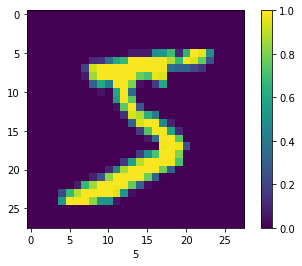

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.xlabel(y_train[0])
plt.grid(False)

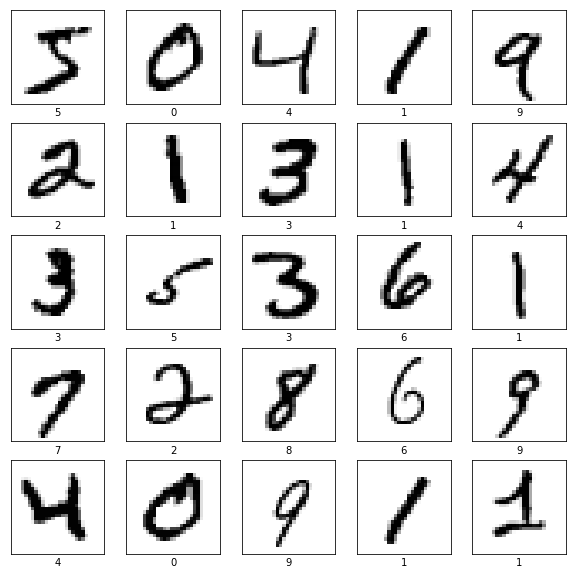

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

## Build the model


### Setup layers

In [143]:
baseline_history= model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

baseline_history= model.fit(x_train, 
                            y_train, 
                            epochs=5)
model.summary()

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.1995 - acc: 0.9411 - val_loss: 0.0801 - val_acc: 0.9760
Epoch 2/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0785 - acc: 0.9754 - val_loss: 0.0533 - val_acc: 0.9836
Epoch 3/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.0500 - acc: 0.9845 - val_loss: 0.0421 - val_acc: 0.9875
Epoch 4/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0378 - acc: 0.9882 - val_loss: 0.0278 - val_acc: 0.9914
Epoch 5/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0159 - val_acc: 0.9954
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         multiple                  0         
_________________________________________________________________
d

## Evaluate accuracy

In [148]:
test_loss, test_acc = model.evaluate(x_train, y_train)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

60000/60000 [==============================] - 3s 48us/step
('Test accuracy:', 0.9953666666666666)
('Test loss:', 0.015918789032077378)


## Make predictions on all dataset

In [40]:
predictions = model.predict(x_test)

In [41]:
predictions[0]

array([1.8163449e-09, 2.1718359e-10, 3.7447133e-08, 1.4040145e-06,
       9.5501637e-14, 4.0536037e-09, 1.4986260e-12, 9.9999845e-01,
       1.2789214e-09, 8.5501149e-08], dtype=float32)

In [44]:
np.argmax(predictions[0])

7

In [46]:
y_test[0]

7

## Predict preview first 10 images

In [82]:
for index, prediction in enumerate(predictions):
    
    if index > 10:
        break
        
    prediction = np.argmax(prediction)
    test = y_test[index]
    assertion = prediction == test
    
    #if assertion == False:
    print(str(index) + " : " + str(prediction) + " => " + str(test) + " => " + str(assertion))
    

0 : 7 => 7 => True
1 : 2 => 2 => True
2 : 1 => 1 => True
3 : 0 => 0 => True
4 : 4 => 4 => True
5 : 1 => 1 => True
6 : 4 => 4 => True
7 : 9 => 9 => True
8 : 5 => 5 => True
9 : 9 => 9 => True
10 : 0 => 0 => True


## Use the trained model to make a prediction about a single image.

In [89]:
# Grab an image from the test dataset
test_image = x_test[0]

print(test_image.shape)

(28, 28)


In [91]:
# Add the image to a batch where it's the only member.
test_image = (np.expand_dims(test_image,0))

print(test_image.shape)

(1, 28, 28)


In [93]:
predictions_single = model.predict(test_image)

print(predictions_single)

[[1.8163483e-09 2.1718401e-10 3.7447204e-08 1.4040185e-06 9.5501820e-14
  4.0535961e-09 1.4986288e-12 9.9999845e-01 1.2789239e-09 8.5501306e-08]]


In [94]:
np.argmax(predictions_single[0])

7

## Plot predictions

### Def functions to plot results

In [114]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Let's look at the 0th image, predictions, and prediction array.

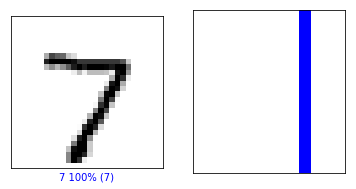

In [115]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

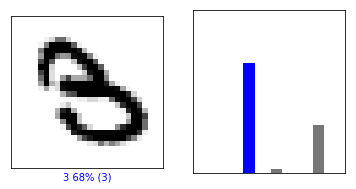

In [120]:
i = 18
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

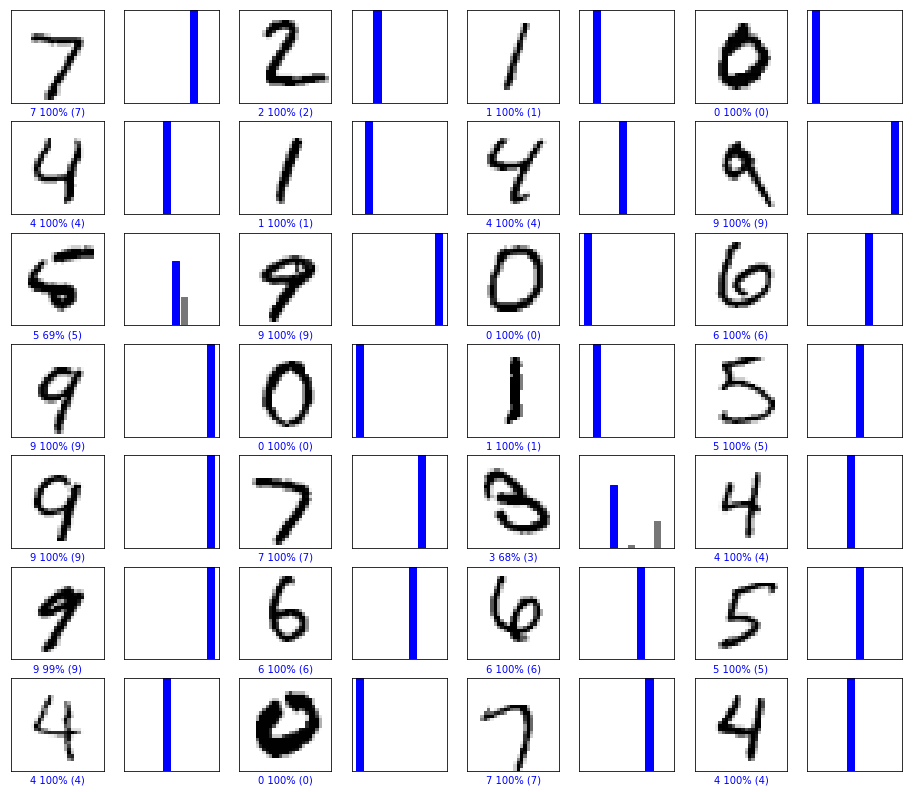

In [119]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 7
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)